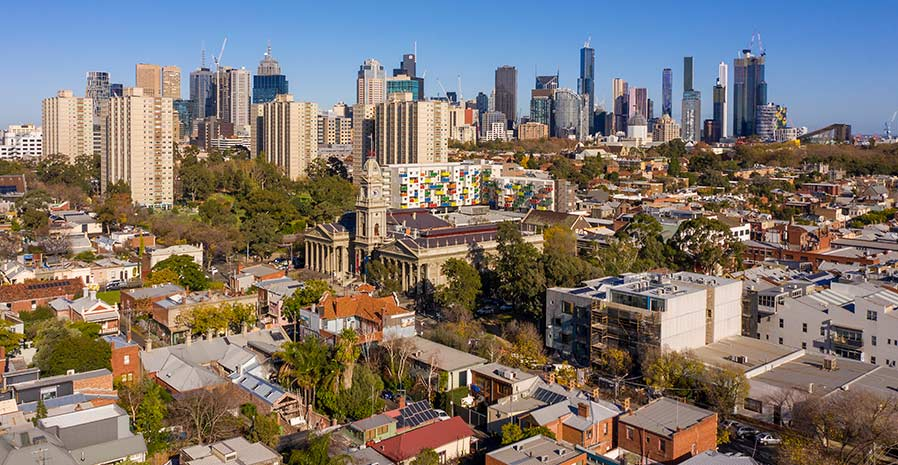

> Homes Melbourne



# Importing Required Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Gathering and Observing Data

In [160]:
df = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [161]:
print(f'Shape: {df_copy.shape}',f'Size: {df_copy.size}')


Shape: (34857, 21) Size: 731997


In [162]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Exploratory Data Analysis

In [163]:
df_copy.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [164]:
categorical_columns = ["Distance","Postcode","Bathroom","Car","CouncilArea","Regionname"]
for column in categorical_columns:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

In [165]:
numeric_columns = ["Price","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]
for column in numeric_columns:
    mean_value = df_copy[column].mean()
    df_copy[column].fillna(mean_value, inplace=True)

In [166]:
df_copy = df_copy.drop("Bedroom2", axis = 1)

In [167]:
df_copy["YearBuilt"] = df_copy["YearBuilt"].astype(int)

In [168]:
categorical_columns_label = ['Suburb', 'Method', 'Type', 'SellerG', 'Regionname', "CouncilArea"]
label_encoder = LabelEncoder()

for col in categorical_columns_label:
    df_copy[col + '_encoded'] = label_encoder.fit_transform(df_copy[col])

df_copy = df_copy.drop(categorical_columns_label, axis=1)

In [169]:
df_copy.corr()["Price"].sort_values()

<ipython-input-169-f38f7a755b52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()["Price"].sort_values()


Type_encoded          -0.329911
YearBuilt             -0.200594
Distance              -0.186848
Lattitude             -0.170840
Suburb_encoded        -0.121037
CouncilArea_encoded   -0.094527
Propertycount         -0.052934
SellerG_encoded       -0.041143
Method_encoded        -0.009431
Landsize               0.026460
Postcode               0.040520
BuildingArea           0.065301
Regionname_encoded     0.067491
Car                    0.141143
Longtitude             0.154873
Bathroom               0.337517
Rooms                  0.404908
Price                  1.000000
Name: Price, dtype: float64

In [170]:
df_copy = df_copy.drop_duplicates()

In [171]:
z_scores = np.abs((df_copy[['Landsize','BuildingArea']] - df_copy[['Landsize','BuildingArea']].mean()) / df_copy[['Landsize','BuildingArea']].std())
data_cleaned = df_copy[(z_scores < 3).all(axis=1)]

In [172]:
df_copy.isnull().sum()

Address                0
Rooms                  0
Price                  0
Date                   0
Distance               0
Postcode               0
Bathroom               0
Car                    0
Landsize               0
BuildingArea           0
YearBuilt              0
Lattitude              0
Longtitude             0
Propertycount          0
Suburb_encoded         0
Method_encoded         0
Type_encoded           0
SellerG_encoded        0
Regionname_encoded     0
CouncilArea_encoded    0
dtype: int64

 Data Visualization:

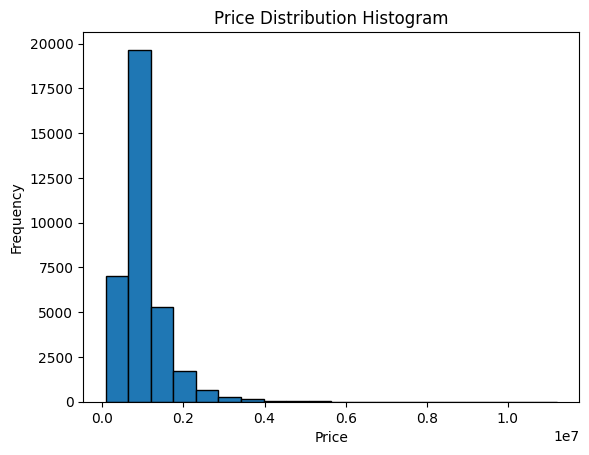

In [173]:
plt.hist(df_copy['Price'], bins=20, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.show()

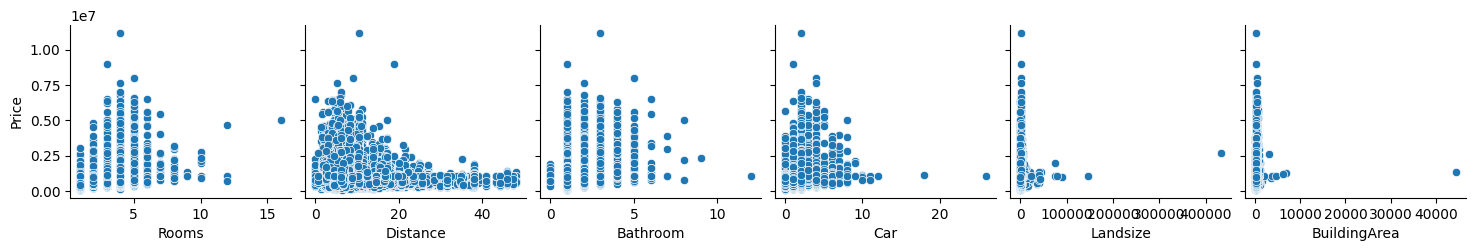

In [174]:
sns.pairplot(df_copy, x_vars=['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'], y_vars=['Price'])
plt.show()

<ipython-input-175-ddf51f96ca89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


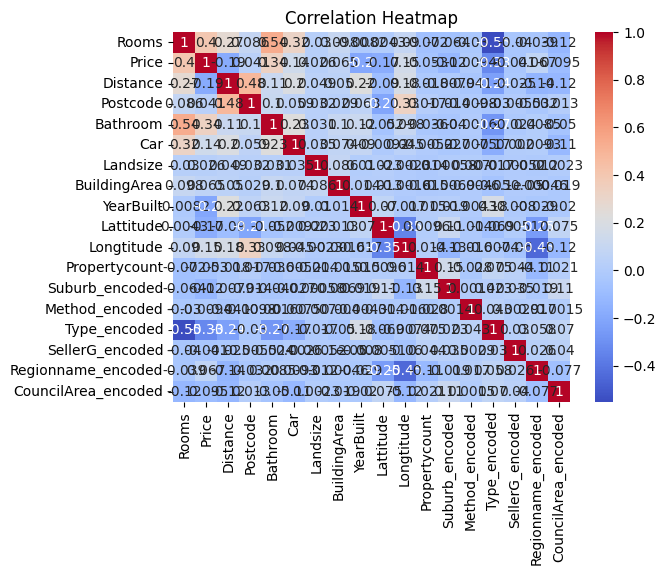

In [175]:
correlation_matrix = df_copy.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Selection

In [177]:
X = df_copy.drop(['Price','Address','Date'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

In [179]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (27884, 17)
Shape of x_test is (6972, 17)
Shape of y_train is (27884,)
Shape of y_test is (6972,)


# Model Evaluation

In [180]:

model_scores = {}

for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    model_scores[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

best_model = min(model_scores, key=lambda k: model_scores[k]['RMSE'])

for model_name, scores in model_scores.items():
    print(f'{model_name} Model:')
    print(f'MAE: {scores["MAE"]}')
    print(f'MSE: {scores["MSE"]}')
    print(f'RMSE: {scores["RMSE"]}')
    print(f'R2: {scores["R2"]}')
    print()

print(f'Best model: {best_model}')




Lasso Model:
MAE: 287431.9442252049
MSE: 224222239556.7267
RMSE: 473521.1078259624
R2: 0.307480888280555

LinearRegression Model:
MAE: 287432.07276320626
MSE: 224220266422.00537
RMSE: 473519.0243506647
R2: 0.3074869823839197

Ridge Model:
MAE: 287431.3705241748
MSE: 224248522577.3281
RMSE: 473548.85975718295
R2: 0.307399712148713

ElasticNet Model:
MAE: 302469.71184388414
MSE: 307890197119.8151
RMSE: 554878.5426738135
R2: 0.04906914569196408

KNeighborsRegressor Model:
MAE: 292334.50723053067
MSE: 224804045990.0473
RMSE: 474135.05037072225
R2: 0.3056839564722189

RandomForestRegressor Model:
MAE: 225922.53496071367
MSE: 155251587676.91104
RMSE: 394019.7808193277
R2: 0.520499430370521

GradientBoostingRegressor Model:
MAE: 243211.52248407603
MSE: 157761421219.9834
RMSE: 397191.9198825467
R2: 0.5127477118110763

AdaBoostRegressor Model:
MAE: 333181.096581049
MSE: 223575304847.4055
RMSE: 472837.5036388352
R2: 0.30947897130356516

Best model: RandomForestRegressor
